In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
sns.set(palette ='Set2', style = 'darkgrid')

In [3]:
INPUT_PATH = 'data/input'
TRANSFORM_PATH = 'data/transformations'

In [4]:
df = pd.read_csv(f'{TRANSFORM_PATH}/pool.csv')

In [5]:
grade_col = 'Оцінка з математичої дисципліни'

In [6]:
x = df[grade_col].copy()

## В рамках тесту 1 сформулювати задачу розподілу мотивацій для свого курсів як задачу перевірки статистичних гіпотез про розподіл даних,  розвязати вручну (Excel),  використати критерій Пірсона

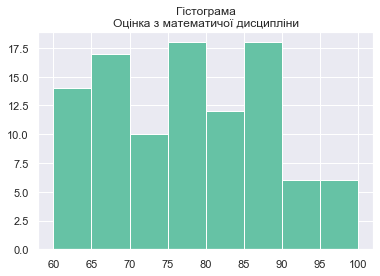

In [7]:
bin_size = 5
n_bins = (x.max() - x.min()) // bin_size
x.hist(bins = n_bins)
plt.title('Гістограма\n' + grade_col);

In [8]:
val_counts = pd.cut(x, bins = n_bins, labels=[i for i in range(65, 101, 5)]).value_counts().sort_index()
pd.cut(x, bins = n_bins).value_counts().sort_index()

(59.96, 65.0]    14
(65.0, 70.0]     18
(70.0, 75.0]      9
(75.0, 80.0]     19
(80.0, 85.0]     12
(85.0, 90.0]     17
(90.0, 95.0]      6
(95.0, 100.0]     6
Name: Оцінка з математичої дисципліни, dtype: int64

In [9]:
df_stats = pd.DataFrame(val_counts)
df_stats.index.name = 'x_i'
df_stats.rename(
    columns={'Оцінка з математичої дисципліни' : 'm_i'},
    inplace=True
)
df_stats.reset_index(inplace=True)
df_stats['x_i'] = df_stats['x_i'].astype(int)

df_stats

,x_i,m_i
0,65,14
1,70,18
2,75,9
3,80,19
4,85,12
5,90,17
6,95,6
7,100,6


In [10]:
mu, sigma = x.mean(), x.std()

h= bin_size

n = len(x)

u_ = lambda x_i: (x_i - mu) / sigma
phi_ = lambda u_i: (1/ np.sqrt(2 * np.pi)) \
                * np.exp(- ((u_i)**2) / 2)
n_hatch_ = lambda phi_i: n*h*phi_i / sigma

In [11]:
df_stats['u_i'] = df_stats['x_i'].apply(lambda x: u_(x))
df_stats['phi_i'] = df_stats['u_i'].apply(lambda u: phi_(u))
df_stats["n_i'"] = df_stats['phi_i'].apply(lambda phi: n_hatch_(phi))
df_stats

,x_i,m_i,u_i,phi_i,n_i'
0,65,14,-1.160388,0.203480,9.596072
1,70,18,-0.693459,0.313680,14.793107
2,75,9,-0.226530,0.388836,18.337463
3,80,19,0.240399,0.387579,18.278184
4,85,12,0.707328,0.310648,14.650105
5,90,17,1.174257,0.200212,9.441964
6,95,6,1.641186,0.103759,4.893255
7,100,6,2.108115,0.043239,2.039141


In [12]:
# calculate degrees of freedom

n = len(df_stats['x_i']) # number of observation categories
k = 2 # number of parameters; our parameters are mu and sigma

ddof = n - k - 1
ddof

5

In [13]:
chi2_real = np.sum(
    ((df_stats['m_i'] - df_stats["n_i'"])**2) / df_stats["n_i'"])

chi2_critical = stats.chi2.ppf(0.95, ddof)

print('chi2_real:', chi2_real)
print('chi2_critical:', chi2_critical)

chi2_real: 21.972791655020224
chi2_critical: 11.070497693516351


Оскільки chi2 наближене більше за chi2 критичне, гіпотезу про нормальний розподіл генеральної сукупності відкидаємо (емпіричні та теоретичні частоти відрізняються значно).

## В рамках тесту 2 сформулювати задачу порівняння мотивацій для різних курсів як задачу перевірки статистичних гіпотез про однорідність даних,  розвязати вручну (Excel),  використати:
- Т-критерій Стьюдента, 
- критерій знаків, 
- критерій Вілкоксона
- критерій Мана-Уітні.

### Т-критерій Стьюдента

Нульова гіпотеза: математичні очікування вибірок рівні.

In [14]:
df.head()

,Курс,Стать,Оцінка з математичої дисципліни,Оцінка з гуманітарної дисципліни,Оцінка з дисципліни за спеціальністю,"1.Коли починаю будь-яку роботу, як правило, сподіваюся на успіх",2.Під час діяльності виявляю активність,3.Маю схильність до виявлення ініціативи,"4.Під час виконання відповідальних завдань намагаюся, якщо це можливо, знайти причини відмовитися від них","5.Часто обираю крайнощі: або надто легкі, або занадто важкі завдання",...,25.Тому що хочу принести більше користі суспільству;,26.Щоб стати висококваліфікованим спеціалістом;,"27.Щоб дізнаватися нове, займатися творчою діяльністю;","28.Щоб дати відповіді на проблеми розвитку суспільства, життєдіяльності людей;",29.Щоб бути «на хорошому рахунку» у викладачів;,30.Щоб досягти схвалення батьків та оточуючих;,"31.Заради виконання обов’язку перед батьками, школою;",32.Тому що знання додають мені впевненості в собі;,33.Тому що від успіхів у навчанні залежить моє майбутнє службове становище;,"34.Бо хочу отримати диплом із гарними оцінками, щоб мати перевагу над іншими."
0,1,ж,100,74,95,ні,так,так,так,так,...,2.0,4,2,4,5,5.0,1,5,2,5
1,1,ч,86,80,88,так,так,ні,так,так,...,3.0,5,5,3,3,3.0,3,3,3,3
2,1,ж,82,94,89,так,так,так,так,так,...,3.0,5,3,3,4,3.0,3,4,4,4
3,1,ч,76,76,76,ні,ні,так,так,так,...,4.0,3,5,4,4,4.0,4,4,5,3
4,1,ж,71,71,71,ні,ні,так,так,ні,...,4.0,5,3,4,3,5.0,3,3,3,4


In [15]:
n_students=40
x1 = df[df['Курс'].isin([1,2])][grade_col].iloc[:n_students]
x2 = df[df['Курс'].isin([2,3])][grade_col].iloc[:n_students]

print(f'Порівняємо оцінки х1 1-2 курсів (к-ть студнетів - {len(x1)}) \
з оцінками х2 3-4 курсів (к-ть студнетів - {len(x2)}).')

Порівняємо оцінки х1 1-2 курсів (к-ть студнетів - 40) з оцінками х2 3-4 курсів (к-ть студнетів - 40).


In [16]:
print(f'x1 mean: {x1.mean():.2f}')
print(f'x2 mean: {x2.mean():.2f}')

x1 mean: 80.30
x2 mean: 77.15


H0: вибірки є однаковими

In [17]:
mu1, mu2 = x1.mean(), x2.mean()
var1, var2 = x1.var(), x2.var()
n1, n2 = len(x1), len(x2)

s_p = np.sqrt(((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2))

t_real = (mu1 - mu2) / (s_p * np.sqrt(1/n1 + 1/n2))
t_crit = stats.t.ppf(0.975,n_students*2-2)

In [18]:
print('t_real:' , t_real)
print('t_crit:' , t_crit)

t_real: 1.3360593133700132
t_crit: 1.990847068555052


Оскільки t-критерій має значення менше за t критичне => не можемо відхилити нульову гіпотезу про рівність математичних очікувань вибірок

### критерій знаків

Нульова гіпотеза: медіани вибірок рівні.

In [19]:
x1, x2 = np.asarray(x1), np.asarray(x2)

In [20]:
print(f'x1 median: {np.median(x1):.2f}')
print(f'x2 median: {np.median(x2):.2f}')

x1 median: 81.50
x2 median: 78.00


In [21]:
df_sign = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x1 - x2': x1 - x2
})

df_sign['sign']= np.sign(df_sign['x1 - x2'])

df_sign.head()

,x1,x2,x1 - x2,sign
0,100,89,11,1
1,86,87,-1,-1
2,82,87,-5,-1
3,76,78,-2,-1
4,71,63,8,1


In [22]:
n = sum(df_sign['sign'] != 0)
n

39

In [23]:
def factorial(n):
    return reduce((lambda x,y: x*y),range(1,n+1))

In [24]:
prob = 0.5 # probability od success
n_pos, n_neg = sum(df_sign['sign'] < 0), sum(df_sign['sign'] < 0)

def combination_ (n, k):
    return factorial(n) / (factorial(k) * factorial(n-k))

binom_ = lambda p, x, n: combination_(n, x) * (p**x * (1-p)**(n-x))
p_val = binom_(prob, n_pos, n)
print('p_val =', p_val)

p_val = 0.12537068761957926


Оскільки p-значення більше за задане альфа (0.05), ми не можемо відхилити нульову гіпотезу про те, що вибірки мають однакові медіани.

### критерій Вілкоксона

Нульова гіпотеза: середні обох виборок співпадають

In [25]:
p_val = stats.wilcoxon(x1, x2).pvalue
print('p_val =', p_val)

p_val = 0.3531634032771521


Оскільки p-значення більше за задане альфа (0.05), ми не можемо відхилити нульову гіпотезу про те, що вибірки мають однакові середні.

### критерій Мана-Уітні.

Нульова гіпотеза: розподіли генеральних сукупностей співпадають

In [26]:
p_val = stats.mannwhitneyu(x1, x2).pvalue
print('p_val =', p_val)

p_val = 0.10680169681308127


Оскільки p-значення більше за задане альфа (0.05), ми не можемо відхилити нульову гіпотезу про те, що розподіли генеральних сукупностей співпадають